# Final Project

## Zhuojiao Dong 91576270

### Basic set up

In [1]:
import pandas, numpy
import matplotlib.pyplot as plt


### Task 1
### Basic Requirements:
1) Using Pandas to load the csv data, and generate X_train, y_train (from traning data file)
as well as X_test, y_test (from test data file) in the Numpy array format. The labels and
pixels can be distinguished from column names of the tabular data.

2) Report the shapes of above arrays.

3) All the remaining tasks below should be based on this data.

In [2]:
# Task 1

# read files by pandas read csv and use the first column as index.
train = pandas.read_csv("kmnist_train.csv", index_col=0)
test = pandas.read_csv("kmnist_test.csv", index_col=0)
# X_train.drop(0)
train
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,7,8,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,...,10,81,104,126,117,46,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9,0,0,0,0,0,0,63,246,255,...,0,0,0,0,0,0,0,0,0,0
9998,4,0,0,0,0,0,0,0,0,0,...,255,151,0,0,0,0,0,0,0,0


In [3]:
# change the data type to numpy array
X_train = numpy.array(train.iloc[:,1:])
y_train= numpy.array(train["label"])
X_test = numpy.array(test.iloc[:,1:])
y_test= numpy.array(test["label"])
# print(X_train,X_train.shape)
# print(X_train)

# report the shapes of above arrays
print(f"X_train shape is {X_train.shape} y_train shape is {y_train.shape}")
print(f"X_test shape is  {X_test.shape}  y_test shape is {y_test.shape}")

X_train shape is (60000, 784) y_train shape is (60000,)
X_test shape is  (10000, 784)  y_test shape is (10000,)


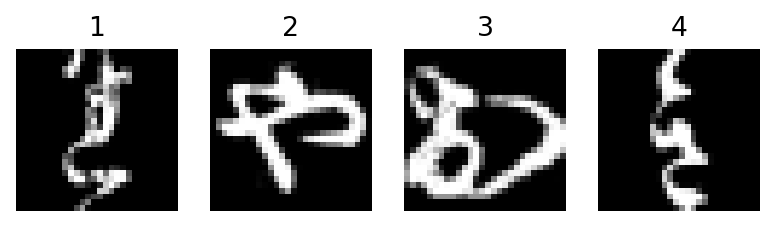

In [4]:
# show a few data by matplotlib
# the part I mute could repeatedly show all the data graph, however, that is too big.
# Thus, I choose to show a few by a four in one plot.
# 
# for x in range(10):
# 
#     image=numpy.array(train.iloc[x,1:]).reshape(28,-1)
# 
#     plt.imshow(image, plt.get_cmap('gray'))


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, dpi=160)

im = ax1.imshow(X_train[0].reshape(28,-1), cmap='gray')     # This is for the first image in the data
ax1.set_title('1')
ax1.set_axis_off()

ax2.imshow(X_train[1].reshape(28,-1), cmap='gray')
ax2.set_title('2')
ax2.set_axis_off()

ax3.imshow(X_train[2].reshape(28,-1), cmap='gray')
ax3.set_title('3')
ax3.set_axis_off()

ax4.imshow(X_train[3].reshape(28,-1), cmap='gray')
ax4.set_title('4')
ax4.set_axis_off()


# Task 2
### Basic Requirements:
1) Write the code to implement logistic regression for classification problem. You can only
use basic Python and Numpy (Scipy) functions. Calling functions in Scikit-Learn or other
machine learning packages is NOT allowed. (3pts)

2) Detailed document strings and comments should be included. (1pt)

3) Evaluate and report the performance of logistic regression on the dataset you choose.
(1pt)

### Inroduction:  
In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

almost the same example of final exam

In [5]:

# Task 2
import numpy as np


class MyLogisticRegression:
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
    The step length that will be taken when following the negative gradient during training.
    """

    def __init__(self, learning_rate=.1):
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate

    def fit(self, data, y, n_iterations=1000):
        """
        Fit the model according to the given training data.
        This fit method will set the n_iteration basic at 1000. 
        This module count for all basic probablity
        then find the largest one and return the result. 
        """
        self.K = max(y) + 1  # specify number of classes in y
        ones = np.ones((data.shape[0], 1))  # column of ones
        X = np.concatenate((ones, data), axis=1)  # the augmented matrix, \tilde{X} in our lecture
        eta = self.learning_rate
        W = np.zeros((np.shape(X)[1], max(y) + 1))  # initialize beta, can be other choices
        for k in range(n_iterations):
            dW = self.loss_gradient(W, X, y)  # write another function to compute gradient
            W = W - eta * dW  # the formula of GD
            # this step is optional -- just for inspection purposes
            #print(k)
            if k % 500 == 0:  # print loss every 500 steps
                print("loss after", k + 1, "iterations is: ", self.loss(W, X, y))
        self.coeff = W

    def predict(self, data):
        # use for predict the data 
        ones = np.ones((data.shape[0], 1))  # column of ones
        X = np.concatenate((ones, data), axis=1)  # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff  # the estimated W
        y_pred = np.argmax(self.sigma(X, W), axis=1)  # the category with largest probability
        return y_pred

    def score(self, data, y_true):
        # back to use predict and find the accuracy between.  
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true)  # number of correct predictions/N
        return acc

    def sigma(self, X, W):  # return the softmax probability
        s = np.exp(np.matmul(X, W))
        total = np.sum(s, axis=1).reshape(-1, 1)
        return s / total

    def loss(self, W, X, y):
        f_value = self.sigma(X, W)
        K = self.K
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value + 1e-10)[:, k] * (y == k)  # avoid nan issues
        return -np.mean(loss_vector)

    def loss_gradient(self, W, X, y):
        f_value = self.sigma(X, W)
        K = self.K
        dLdW = np.zeros((X.shape[1], K))
        for k in range(K):
            dLdWk = (f_value[:, k] - (y == k)).reshape(-1, 1) * X  # Numpy broadcasting
            dLdW[:, k] = np.mean(dLdWk, axis=0)  # RHS is 1D Numpy array -- so you can safely
            # put it in the k-th column of 2D array dLdW
        return dLdW

In [6]:
# uses the previous one
# run logistic regression
lg = MyLogisticRegression(learning_rate=1e-4)
lg.fit(X_train,y_train,n_iterations = 100)
print(lg.coeff)



loss after 1 iterations is:  3.1875342095995323
[[-3.86138763e-05  4.27190538e-05  6.11672450e-05 ... -8.82440640e-05
   2.93916880e-05  1.74101892e-05]
 [ 2.79371953e-05 -6.08136467e-05 -4.27050635e-05 ... -2.26156365e-05
  -5.51266735e-05  1.25517482e-04]
 [ 7.52965187e-05 -4.03045229e-05 -1.12418454e-04 ...  2.19764885e-05
  -1.87180403e-04  2.41964491e-04]
 ...
 [-4.59872451e-04 -3.08769982e-04 -1.83744376e-04 ... -1.78951427e-04
   1.71590333e-04  1.04463883e-03]
 [-2.17363900e-04 -4.21174989e-05  2.61188149e-05 ... -1.22403472e-04
   9.57696379e-05  6.47597107e-04]
 [-6.20082579e-05  5.56484199e-05  9.83760775e-05 ... -1.42447733e-05
   1.54399656e-04  1.80410394e-04]]


In [7]:
# test the performance of logistic regression
lg.score(X_test,y_test)  

0.613

the score for the model I make, 
I just use a few iteration due, 
sicne the iteration is really slow.
if you wish to have a better performance, please use 20000 n_iteration instead

For the next part, I uses the skearn model for tset.

In [4]:
from sklearn.linear_model import LogisticRegression
print("done import")
lg = LogisticRegression(max_iter=200)
lg.fit(X_train,y_train)
# print(f"finish training")
print(lg.score(X_test,y_test))
0.6911

done import
0.6903


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6911

# Task 3 PCA implement
### Basic Requirements:
1) Write the code to implement PCA and return the first n principle components (n as the
parameter). You can only use basic Python and Numpy/Matplotlib/Pandas/Seaborn/Scipy
functions. Calling functions in Scikit-Learn or other machine learning packages is NOT
allowed. (3pts)

2) Detailed document strings and comments should be included. (1pt)

3) Run PCA on test data, and visualize the results by scatter plot. The true labels of each
sample should be distinguished by different colors. (1pt)


### Introducion: 
Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

In [3]:

# PCA implement


class MyPCA:
    # PCA is Principal component analysis.
    # it can reduce the complexity of the original dataset.

    def __init__(self, n_components=2):
        # this is the initialization, set the principal part in the function that you going to use.
        # by default, this value is 2.
        self.n_c = n_components

    def fit(self, X):
        # calculate the PCA by covariance matrix.

        cov_mat = np.cov(X.T)  # covariance matrix, the input matrix to this function does not need to be centered
        eig_val, eig_vec = np.linalg.eigh(cov_mat)  # eigen-values and orthogonal eigen-vectors --ascending order
        eig_val = np.flip(eig_val)  # reverse the order --descending
        eig_vec = np.flip(eig_vec, axis=1)  # reverse the order
        self.eig_values = eig_val[:self.n_c]  # select the top eigen-vals
        self.principle_components = eig_vec[:, :self.n_c]  # select the top eigen-vecs
        self.variance_ratio = self.eig_values / eig_val.sum()  # variance explained by each PC

    def transform(self, X):
        # Transform the data to the type that could plot.
        return np.matmul(X - X.mean(axis=0), self.principle_components)  # project the data (centered) on PCs



the graph for the pca

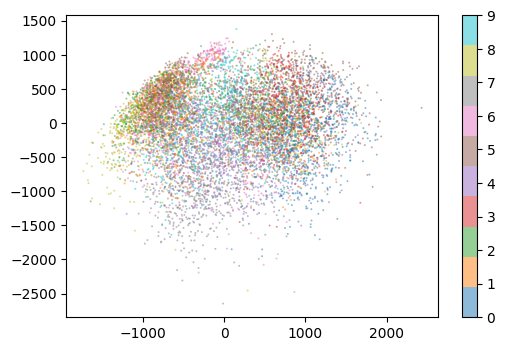

In [4]:
import numpy as np
pca = MyPCA()
pca.fit(X_test)
pca_plot = pca.transform(X_test)
figure = plt.figure(dpi=100)
plt.scatter(pca_plot[:, 0], pca_plot[:, 1],c=y_test, s=2, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar()

# Task 4
### Basic Requirements 
1) Try at least one supervised (2pts) andone unsupervised (2pts) methods other than logistic regression and PCA on the dataset you choose.

2) Before calling the function, write one paragraph in Markdown file to introduce the basic model and algorithm of each method. You're required to use Latex to type formulas.

3) If possible, compare the results with logistic regression/PCA. If you use clustering methods, please evaluate the performance of the clustering by comparing to the true labels. 

Hint: Please choose the appropriate methods. For example, using regression models for classification problem is not appropriate.

### Linear regression

- With the training dataset, define the loss function $L(\beta)$ of parameters $\beta$, which is also called **mean squared error** (MSE) $$L(\beta)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y^{(i)}\big)^2 = \frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\tilde{x}^{(i)}\beta)^{2},$$
where $\hat{y}^{(i)}$ denotes the predicted value of y at $x^{(i)}$, i.e. $$\hat{y}^{(i)} = \beta_{0}+\beta_{1}x^{(i)}_{1}+..+\beta_{p}x^{(i)}_{p} = \tilde{x}^{(i)}\beta.$$ 
    
    Now the problem becomes $$\min_{\beta}L(\beta),$$ i.e. find the minimizer of a multi-variable (p+1 dimensions) function.


- Then find the minimum of loss function -- There are two ways, either by numerical optimization (will be introduced in discussion) or by solving linear systems (introduced below), which is also called the **normal equation** approach.


To solve the critical points, we have $\nabla L(\beta)=0$.
$$
\begin{aligned}
\frac{\partial L}{\partial \beta_{0}}&=2\sum_{i=1}^{N}(\tilde{x}^{(i)}\beta-y^{(i)})=0,\\
\frac{\partial L}{\partial \beta_{k}}&=2\sum_{i=1}^{N} x_{k}^{(i)}(\tilde{x}^{(i)}\beta-y^{(i)})=0,\quad k=1,2,..,p.
\end{aligned}
$$

In Matrix form, it can be expressed as (left as exercise) $$\tilde{X}^{T}\tilde{X}\beta=\tilde{X}^{T}Y,$$

also called the **normal equation** of linear regression. 
The optimal parameter 
$\hat{\beta}=\text{argmin} L(\beta)$
is also called the ordinary least square (**OLS**) estimator in statistics community.

Then the OLS estimator can be solved as $$\hat{\beta}=(\tilde{X}^{T}\tilde{X})^{-1}\tilde{X}^{T}Y.$$

**[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares)**

Denote $\tilde{X}=(\tilde{X}_{0},\tilde{X}_{1},..,\tilde{X}_{p})$, then $\tilde{X}\beta=\sum_{k=0}^{p}\beta_{k}\tilde{X}_{k}$. We require that the residual $Y-\tilde{X}\beta$ is vertical to the plane spanned by $\tilde{X}_{k}$, which yields $$\tilde{X}_{k}^{T}(Y-\tilde{X}\beta)=0,\quad k = 0,1,...,p$$

**Exercise**: Check that when $p=1$, the solution is equivalent to the single-variable regression. 

### Prediction in Test Data

Given the new observation called $x^{(test)}$, we have the prediction as $$\hat{y}^{(test)}=\hat{\beta}_{0}+\hat{\beta}_{1}x^{(test)}_{1}+..+\hat{\beta}_{p}x^{(test)}_{p} = \tilde{x}^{(test)}\hat{\beta}.$$

### Evaluating the model

- MSE: The smaller MSE indicates better performance
- R-Squared: The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

In [5]:
from sklearn.linear_model  import LinearRegression

lg = LinearRegression()
lg.fit(X_train,y_train)
print(lg.score(X_test,y_test))


0.18447725910293677


###  comment
Since this data does not looks like a linear regression, it can not show by a effective linear regression. 

I also try some other, but I acturally not fully understand them. 

In [4]:
# MLP in sklearn
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 4.21042709
Iteration 2, loss = 1.18808579
Iteration 3, loss = 0.88395875
Iteration 4, loss = 0.71167893
Iteration 5, loss = 0.59415039
Iteration 6, loss = 0.51286421
Iteration 7, loss = 0.44852256
Iteration 8, loss = 0.40561943
Iteration 9, loss = 0.36814375
Iteration 10, loss = 0.34284436
Iteration 11, loss = 0.32021610
Iteration 12, loss = 0.31414882
Iteration 13, loss = 0.29725599
Iteration 14, loss = 0.28607129
Iteration 15, loss = 0.27854250
Iteration 16, loss = 0.26616825
Iteration 17, loss = 0.25773122
Iteration 18, loss = 0.24608004
Iteration 19, loss = 0.23823631
Iteration 20, loss = 0.23780182
Iteration 21, loss = 0.23518370
Iteration 22, loss = 0.23067934
Iteration 23, loss = 0.21725888
Iteration 24, loss = 0.21380572
Iteration 25, loss = 0.21070033
Iteration 26, loss = 0.19940294
Iteration 27, loss = 0.19526023
Iteration 28, loss = 0.19246799
Iteration 29, loss = 0.18856903
Iteration 30, loss = 0.18753063
Iteration 31, loss = 0.17816647
Iteration 32, los

MLPClassifier(verbose=True)

In [5]:
mlp.score(X_test,y_test)

0.8078

For this thing, uses the tensorflow would be much better. and efficient. For this time it runs kind of slow.

# unsurprised learning tSNE

## [t-distributed stochastic neighbor embedding (tSNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

tSNE is the de facto most popular dimension reduction method in current data science research. It is great for visualization of high-dimensional data, mainly because it alleviates the "crowding" problem in the low-dimensional embedding, by introducing the t-distribution kernel (heavier tail than gaussian). 

**Basic intuition**: The random walk on high-dimensional data should be similar to the random walk in the embedded low-dimensional space.

**How to do it**: Construct the transition probability matrices of random walk in high-dimensional (denoted by $P$, which is $n\times n$ matrix) and low-dimensional space (denoted by $Q$), with Gaussian and t-distribution kernels respectively. Note that $Q$ contains the variable $y_{1},...,y_{n}\in \mathbb{R}^{k}$, i.e. reduced coordinates. tSNE aims to find the best $y_{1},...,y_{n}\in\mathbb{R}^{k}$ that minimizes the "distance" (KL divergence) between $P$ and $Q$ -- using gradient descent.

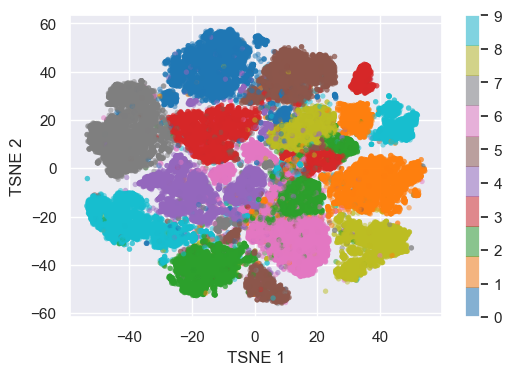

In [4]:

from sklearn.manifold import TSNE
tsne = TSNE(n_jobs = -1)
X_tsne = tsne.fit_transform(X_train)


import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_train, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar()


For this one it is also clustering, it shows a better performance than PCA, it is based on the idea of random walk. 
link for tSNE visulaize https://distill.pub/2016/misread-tsne/

# Task 5
### Basic Requirements:
Try one of the following package on the dataset you select. In this task, you may find running in Kaggle Notebook or Google Colab very helpful, especially for tasks involving GPU computation.

## Use Tensorflow for task 5
a nerual network

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
# print("done import")


In [10]:

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
print("finish set up")



finish set up


In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)


x_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    # pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Fit model on training data
Epoch 1/20
782/782 [==============================] - 1s 1ms/step - loss: 2.3276 - sparse_categorical_accuracy: 0.6449 - val_loss: 0.9240 - val_sparse_categorical_accuracy: 0.7459
Epoch 2/20
782/782 [==============================] - 1s 997us/step - loss: 0.7680 - sparse_categorical_accuracy: 0.7920 - val_loss: 0.7799 - val_sparse_categorical_accuracy: 0.8164
Epoch 3/20
782/782 [==============================] - 1s 1ms/step - loss: 0.6552 - sparse_categorical_accuracy: 0.8318 - val_loss: 0.6529 - val_sparse_categorical_accuracy: 0.8242
Epoch 4/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5700 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.6528 - val_sparse_categorical_accuracy: 0.8488
Epoch 5/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5243 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.6669 - val_sparse_categorical_accuracy: 0.8582
Epoch 6/20
782/782 [==============================] - 1s 1ms/step - los

test loss, test acc: [1.2095677852630615, 0.8202000260353088]

The Tensorflow is a powerful one it shows a much better result than the logistic regression. Also the time it take is also shorter. 